# RNA-seq preprocessing notebook

This is a general processing notebook for doing initial analysis and pre-processing of RNA-seq data imported from GEO using the R code in this GitHub. In principle, any data and annotation csv files can be analyzed here.

The steps are as follows:
- first choose a GEO file and download it using the included R file
- import the required packages (first conda install if necessary)
- drop the NAs and lowly expressed genes
- log transform if necessary
- choose the genes with the biggest variance
- make a clustergram to see if 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('heart_data.csv',index_col=0)
df = df.set_index('IDENTIFIER')
df.drop(['ID_REF'],axis = 1, inplace=True)
df.head()


,GSM827665,GSM827666,GSM827667,GSM827668,GSM827669,GSM827670,GSM827671,GSM827672,GSM827673,GSM827674,...,GSM827795,GSM827796,GSM827797,GSM827798,GSM827799,GSM827800,GSM827801,GSM827802,GSM827803,GSM827804
IDENTIFIER,,,,,,,,,,,,,,,,,,,,,
ILMN_1725881,8.0783,8.0189,7.8907,7.9082,7.7422,7.8939,7.9011,7.8656,7.9115,7.9085,...,7.9840,8.0495,8.0462,7.8254,7.9233,7.9587,7.8388,8.0381,7.7877,8.1041
NRP2,7.7440,7.8626,7.8720,7.8736,8.0019,7.8851,7.9639,8.0787,7.6935,7.5957,...,7.6352,7.8186,7.8160,7.6052,7.9147,7.7971,7.9199,7.8793,7.9076,7.7963
FCGR2B,8.3487,8.8125,8.0670,8.0666,8.1002,8.9358,8.9034,9.1678,8.4526,8.3489,...,9.1801,8.4170,8.4627,8.0903,7.9534,8.7544,8.3479,8.4726,8.2293,8.4839
TRIM44,11.9833,11.9644,10.5251,10.8571,10.4971,11.7353,11.3942,12.2671,11.7735,11.9713,...,11.6420,11.1516,11.8130,10.6362,10.5900,9.7028,10.1156,10.8479,10.6889,11.6963
ILMN_1811966,8.2880,7.9810,8.2419,8.1967,8.1809,7.9205,8.0339,8.0821,8.1426,7.8695,...,8.3393,8.3908,8.1721,8.1424,7.9346,7.8202,7.8940,8.0708,8.1942,8.0630


In [13]:
annot = pd.read_csv('heart_annot.csv', index_col = 0)
annot.head()

,sample,disease.state,description
1,GSM827665,control,Value for GSM827665: Control_PAH-100; src: PBMC
2,GSM827666,control,Value for GSM827666: Control_PAH-101; src: PBMC
3,GSM827667,control,Value for GSM827667: Control_PAH-102; src: PBMC
4,GSM827668,control,Value for GSM827668: Control_PAH-103; src: PBMC
5,GSM827669,control,Value for GSM827669: Control_PAH-104; src: PBMC


The format of the annotation file is going to be a sample specific, so here I just want to drop the description and make sample the index

In [14]:

annot = annot.set_index('sample')
annot.drop(['description'],axis=1,inplace=True)
annot.columns=['state'] #giving annot a name that can be used throughout the notebook without being data-specific
df.shape

(49576, 140)

now drop the NAs and lowly expressed genes

In [15]:
df.dropna(axis=0,inplace=True)
print(df.shape)

## Filter out non-expressed genes
df = df.loc[df.sum(axis=1) > 0, :]
print(df.shape)

## Filter out lowly expressed genes
mask_low_vals = (df > 0.3).sum(axis=1) > 2
df = df.loc[mask_low_vals, :]

print(df.shape)

(48803, 140)
(48803, 140)
(48803, 140)


Now take the 100 genes with the biggest variance

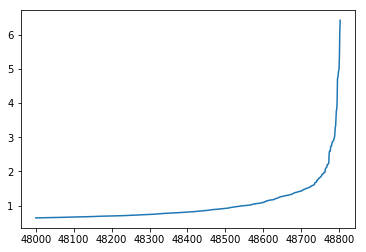

In [102]:

variances = np.var(df, axis=1)
plt.axes()
plt.plot(range(48000,48804),variances[variances.argsort()[47999:48803]])
srt_idx = variances.argsort()[::-1]
df_sub = df.iloc[srt_idx].iloc[:500]
#print(df_sub.shape)
#df_sub.head()

In [103]:
df_sub.head()


,GSM827665,GSM827666,GSM827667,GSM827668,GSM827669,GSM827670,GSM827671,GSM827672,GSM827673,GSM827674,...,GSM827795,GSM827796,GSM827797,GSM827798,GSM827799,GSM827800,GSM827801,GSM827802,GSM827803,GSM827804
IDENTIFIER,,,,,,,,,,,,,,,,,,,,,
HLA-A,14.7604,8.4695,12.1914,13.3179,12.3691,13.4850,14.2907,13.2289,13.3523,14.0714,...,8.5215,14.3351,14.3950,8.1883,12.8404,8.4027,12.5643,12.3677,12.9375,14.2238
ALAS2,9.1014,9.9025,8.6580,8.3574,8.2247,10.3648,11.0317,8.9639,10.3025,8.8859,...,12.1699,14.4522,12.7122,13.7992,16.3967,16.5609,16.9655,12.1892,8.4952,10.7992
HBD,9.2193,9.6977,8.3809,8.3235,8.0532,10.0513,10.0159,8.7892,9.4990,8.5972,...,11.8128,14.6996,11.6543,13.0178,15.9005,15.3716,16.4770,11.8990,8.3813,11.2177
HBG2,8.6411,10.2091,8.9542,8.7045,9.2549,11.0273,12.4197,10.8269,12.6571,13.4989,...,10.9822,14.1872,11.9108,14.7397,16.0105,14.7144,17.0496,13.4109,12.4329,13.6224
HBG1,8.8042,10.0068,8.7255,8.4249,9.4009,10.8359,12.0841,10.5479,12.4310,13.2571,...,11.0108,14.3813,12.0899,14.5114,15.6661,14.7904,16.8659,13.3897,12.0937,12.9976


In [127]:
annot.columns=['state']
annot.head(90)

,state
sample,
GSM827665,control
GSM827666,control
GSM827667,control
GSM827668,control
GSM827669,control
GSM827670,control
GSM827671,control
GSM827672,control
GSM827673,control


In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [107]:
df_sub = df_sub.transpose()

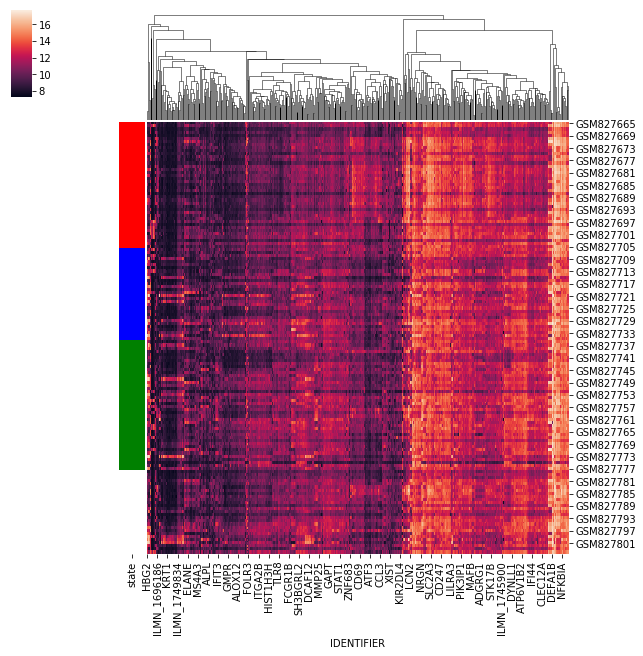

In [112]:
lut = dict(zip(annot.state.unique(), "rbg"))
col_colors = annot.state.map(lut)
g = sns.clustermap(df_sub, row_colors=col_colors,row_cluster=False)

In [108]:
scaler.fit(df_sub,)
scaled_data = scaler.transform(df_sub)

In [109]:
sd = pd.DataFrame(scaled_data, index=df.columns )

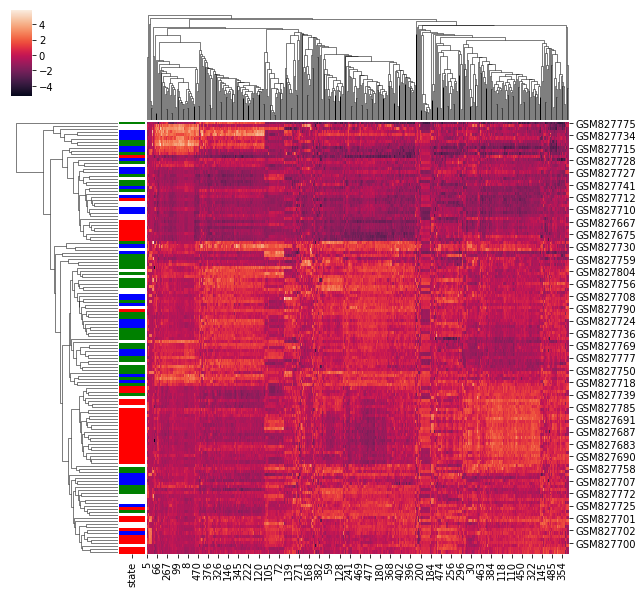

In [110]:
lut = dict(zip(annot.state.unique(), "rbg"))
col_colors = annot.state.map(lut)
g = sns.clustermap(sd, row_colors=col_colors)

In [101]:
#new_col = g.dendrogram_col.reordered_ind

In [82]:
#col_linkage = pd.DataFrame(g.dendrogram_col.linkage)

In [83]:
#col_linkage.head()

In [113]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

In [114]:
#sd = pd.DataFrame(scaled_data.transpose(),columns=df_sub.index, index=df_sub.columns)
pca.fit(sd)
x_pca = pca.transform(sd)
print(sd.shape)
print(x_pca.shape)

(140, 500)
(140, 4)


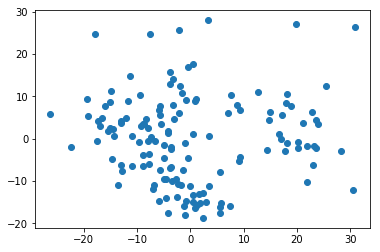

In [115]:
plt.scatter(x_pca[:,0],x_pca[:,1],)

In [116]:
p=pd.DataFrame(x_pca, index=df.columns)

In [117]:
p.columns = ['dim1','dim2','dim3','dim4']

In [118]:
p['annot']=annot

In [119]:
p.head()

,dim1,dim2,dim3,dim4,annot
GSM827665,-2.780986,-9.467602,-1.802979,-5.348179,control
GSM827666,-3.366564,-10.034046,-1.028425,-2.910385,control
GSM827667,28.186967,-2.883742,-1.657549,-2.846324,control
GSM827668,16.985141,-0.168118,-2.356067,-5.353848,control
GSM827669,23.564801,-2.232796,-4.967475,-2.518710,control


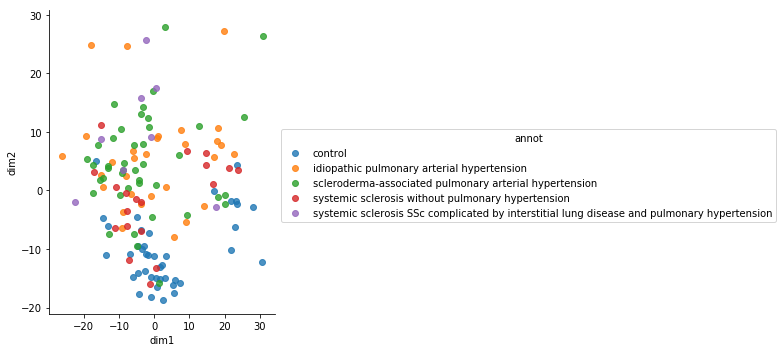

In [120]:
sns.lmplot('dim1','dim2',p,hue='annot',fit_reg=False)

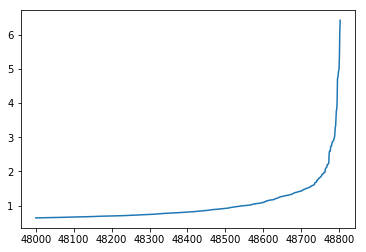

In [196]:
variances = np.var(df, axis=1)
plt.axes()
plt.plot(range(48000,48804),variances[variances.argsort()[47999:48803]])
srt_idx = variances.argsort()[::-1]
df_sub = df.iloc[srt_idx].iloc[:5000]

this usual method of taking the most highly expressed genes is not really working. Maybe we can do a gene by gene anova and choose genes that are differently expressed between the known cancer patients and known cancer free patients

In [197]:
df_sub=df_sub.transpose()
df_sub['state']=annot['state']
df_sub.head()

IDENTIFIER,HLA-A,ALAS2,HBD,HBG2,HBG1,HLA-DRB5,RPS4Y1,HLA-DRB1,AHSP,CXCL8,...,CCT6A,PEX16,TIMM22,ATP2A2,NSMF,CDC42EP4,RPAP3,STAU1,ILMN_1661174,state
GSM827665,14.7604,9.1014,9.2193,8.6411,8.8042,7.7562,7.9018,10.8081,8.7740,13.5267,...,10.8194,11.9740,11.5080,10.5098,12.0795,10.5889,10.0625,10.7276,16.2582,control
GSM827666,8.4695,9.9025,9.6977,10.2091,10.0068,8.7533,14.5745,10.7027,9.2407,13.3399,...,10.7453,12.0548,11.0861,10.6377,11.7925,10.8771,10.0733,10.8499,16.3672,control
GSM827667,12.1914,8.6580,8.3809,8.9542,8.7255,12.4008,7.7871,12.2410,8.1121,11.2186,...,9.2327,10.7968,9.9507,8.8525,10.5318,9.4605,8.7635,8.9840,15.4879,control
GSM827668,13.3179,8.3574,8.3235,8.7045,8.4249,13.3182,7.8054,12.6336,8.1922,11.6550,...,9.7257,11.2050,10.8308,9.3929,10.5653,9.5886,9.3177,9.6060,15.2235,control
GSM827669,12.3691,8.2247,8.0532,9.2549,9.4009,8.3456,7.9144,8.1695,8.2666,12.1729,...,9.3619,10.8548,10.0703,9.1092,10.4942,9.5018,8.7960,9.2798,15.3429,control


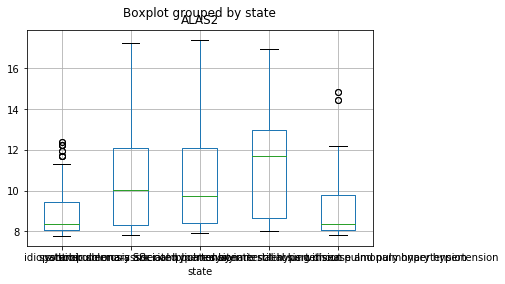

In [198]:
df_sub.boxplot('ALAS2',by='state')


In [187]:
from scipy import stats

In [199]:
pvalues = np.empty([1,5001])
fvalues = np.empty([1,5001])
for x in range(1, 5000):
    f_val,p_val = stats.f_oneway(df_sub[df_sub['state']=='control'].iloc[:,x],df_sub[df_sub['state']=='idiopathic pulmonary arterial hypertension'].iloc[:,x])
    pvalues[0,x-1] = p_val
    fvalues[0,x-1] = f_val
    #print(p_val)
    
pdf = pd.DataFrame(pvalues,columns=df_sub.columns)
fdf = pd.DataFrame(fvalues,columns=df_sub.columns)

In [188]:
pdf.head()

IDENTIFIER,HLA-A,ALAS2,HBD,HBG2,HBG1,HLA-DRB5,RPS4Y1,HLA-DRB1,AHSP,CXCL8,...,CCT6A,PEX16,TIMM22,ATP2A2,NSMF,CDC42EP4,RPAP3,STAU1,ILMN_1661174,state
0,0.000002,7.764664e-08,0.000055,0.000053,0.647162,0.976862,0.178058,8.813220e-07,0.000344,0.027126,...,0.007178,0.31519,0.955995,0.009996,0.044676,0.166561,0.560624,0.007279,9.521537e-312,9.520840e-312


In [200]:
fdf.max(axis=1)

0    81.135404
dtype: float64

In [201]:
pdft=pdf.transpose()

In [202]:
fdft=fdf.transpose()
df_sub=df_sub.transpose()

In [203]:
df_sub['pdf']=pdft
df_sub['fdf']=fdft

In [204]:
df_sub.head()

,GSM827665,GSM827666,GSM827667,GSM827668,GSM827669,GSM827670,GSM827671,GSM827672,GSM827673,GSM827674,...,GSM827797,GSM827798,GSM827799,GSM827800,GSM827801,GSM827802,GSM827803,GSM827804,pdf,fdf
IDENTIFIER,,,,,,,,,,,,,,,,,,,,,
HLA-A,14.7604,8.4695,12.1914,13.3179,12.3691,13.485,14.2907,13.2289,13.3523,14.0714,...,14.395,8.1883,12.8404,8.4027,12.5643,12.3677,12.9375,14.2238,1.566087e-06,27.616092
ALAS2,9.1014,9.9025,8.658,8.3574,8.2247,10.3648,11.0317,8.9639,10.3025,8.8859,...,12.7122,13.7992,16.3967,16.5609,16.9655,12.1892,8.4952,10.7992,7.764664e-08,36.146894
HBD,9.2193,9.6977,8.3809,8.3235,8.0532,10.0513,10.0159,8.7892,9.499,8.5972,...,11.6543,13.0178,15.9005,15.3716,16.477,11.899,8.3813,11.2177,5.518290e-05,18.483962
HBG2,8.6411,10.2091,8.9542,8.7045,9.2549,11.0273,12.4197,10.8269,12.6571,13.4989,...,11.9108,14.7397,16.0105,14.7144,17.0496,13.4109,12.4329,13.6224,5.310369e-05,18.576929
HBG1,8.8042,10.0068,8.7255,8.4249,9.4009,10.8359,12.0841,10.5479,12.431,13.2571,...,12.0899,14.5114,15.6661,14.7904,16.8659,13.3897,12.0937,12.9976,6.471617e-01,0.211344


In [207]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, ALAS2 to ACTR10
Columns: 140 entries, GSM827665 to GSM827804
dtypes: object(140)
memory usage: 124.0+ KB


In [208]:
df_f = df_sub.loc[df_sub['fdf'] > 35]
df_f=df_f.drop(['pdf','fdf'],axis=1)
#df_f = df_f.drop('state',axis=0)
df_f.head()

,GSM827665,GSM827666,GSM827667,GSM827668,GSM827669,GSM827670,GSM827671,GSM827672,GSM827673,GSM827674,...,GSM827795,GSM827796,GSM827797,GSM827798,GSM827799,GSM827800,GSM827801,GSM827802,GSM827803,GSM827804
IDENTIFIER,,,,,,,,,,,,,,,,,,,,,
ALAS2,9.1014,9.9025,8.658,8.3574,8.2247,10.3648,11.0317,8.9639,10.3025,8.8859,...,12.1699,14.4522,12.7122,13.7992,16.3967,16.5609,16.9655,12.1892,8.4952,10.7992
ILMN_1804350,9.0445,8.6639,8.5009,8.6468,8.5905,8.7033,9.6447,8.474,9.3439,8.3835,...,8.7638,10.5475,9.6988,11.5677,14.1862,14.5711,15.4201,10.2069,8.5578,9.2413
ILMN_1693262,10.8116,14.0289,11.8287,13.2548,10.6124,14.4016,16.4751,12.8053,11.8969,10.2234,...,14.514,14.9912,14.8346,10.0484,15.2043,12.4829,15.5377,13.3752,11.2657,13.6228
OLFM4,8.4365,11.5302,9.0631,8.3421,8.3082,11.4063,13.206,10.1016,10.2462,8.3399,...,10.6707,11.6933,13.6313,8.5278,11.6192,10.7543,12.6865,9.4484,8.8664,10.3777
FCGR3B,9.9657,9.4092,8.1475,8.2792,8.4825,8.9299,9.9681,9.099,11.2637,9.0682,...,10.4309,10.1395,10.4266,9.1997,9.3918,14.7588,10.0244,13.3563,9.8153,12.1047


In [215]:
df_p = df_sub.loc[df_sub['pdf'] <0.001]
df_p = df_p.drop(['pdf','fdf'],axis=1)
df_p = df_p.drop('state')
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755 entries, HLA-A to ILMN_1661174
Columns: 140 entries, GSM827665 to GSM827804
dtypes: object(140)
memory usage: 831.7+ KB


so we have 129 significant genes

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

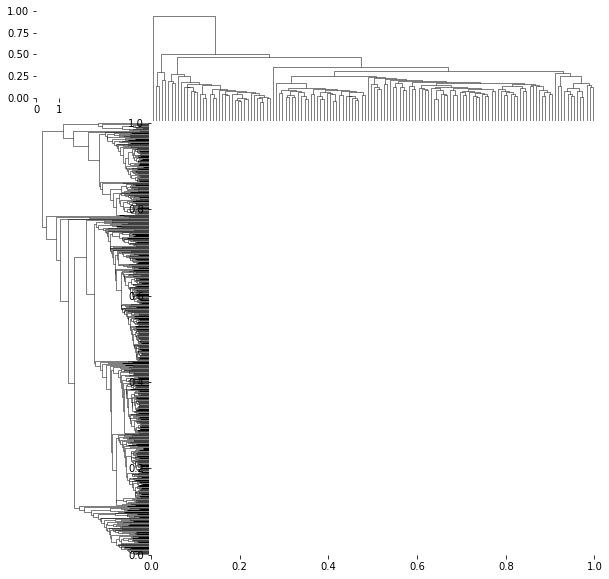

In [216]:
lut = dict(zip(annot.state.unique(), "rbg"))
col_colors = annot.state.map(lut)
g = sns.clustermap(df_p)

In [228]:
df_f = df_f.transpose()
df_p = df_p.transpose()

In [229]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_f)
scaled_data = scaler.transform(df_f)
sd = pd.DataFrame(scaled_data, columns=df_f.columns)

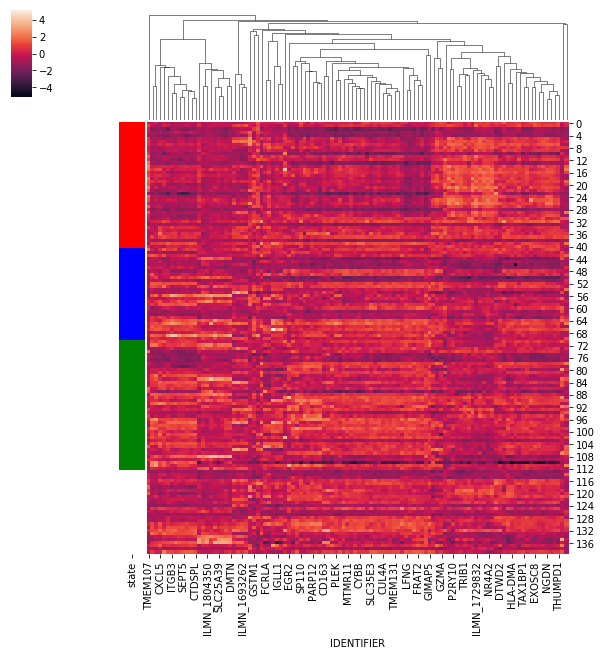

In [231]:
lut = dict(zip(annot.state.unique(), "rbg"))
col_colors = annot.state.map(lut)
g = sns.clustermap(sd, row_colors=col_colors,row_cluster=False)

In [232]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
#sd = pd.DataFrame(scaled_data.transpose(),columns=df_sub.index, index=df_sub.columns)
pca.fit(sd)
x_pca = pca.transform(sd)
print(sd.shape)
print(x_pca.shape)

(140, 108)
(140, 4)


In [236]:
p=pd.DataFrame(x_pca, index=df_sub.columns[:-2])

In [237]:
p.columns = ['dim1','dim2','dim3','dim4']

In [238]:
p['annot']=annot

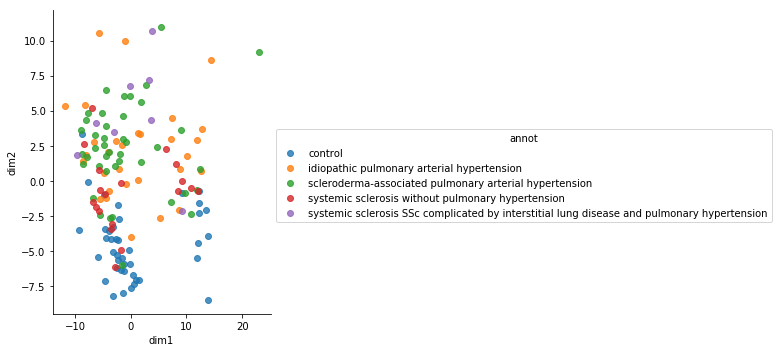

In [239]:
sns.lmplot('dim1','dim2',p,hue='annot',fit_reg=False)

it looks like I might get better separation if I look for genes that are differentially expressed between the hypertension and non-hypertension group